In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
file_path = '/kaggle/input/currency-exchange-rates/exchange_rates.csv'

/kaggle/input/currency-exchange-rates/exchange_rates.csv


# 📙 1. Load data

In [2]:
dataset = pd.read_csv(file_path, parse_dates=['date'], index_col = 0)
dataset.head()

,Country/Currency,currency,value,date
0,Australia Dollar,AUD,1.581627,2021-12-17
1,Great Britain Pound,GBP,0.851619,2021-12-17
2,Euro,EUR,1.000000,2021-12-17
3,Japan Yen,JPY,128.301759,2021-12-17
4,Switzerland Franc,CHF,1.041015,2021-12-17


In [3]:
# some insight about whole dataset
dataset.describe()

,value
count,91176.000000
mean,1646.740359
std,5474.453605
min,0.130975
25%,3.962336
50%,34.760292
75%,395.870479
max,51690.453353


# 📙 2. EDA on Currency data

## 2.1 First check if any null values present

In [4]:
dataset.isnull().sum()

Country/Currency    0
currency            0
value               0
date                0
dtype: int64

## 2.2 Types of Currency data present

In [5]:
dataset['currency'].unique()

array(['AUD', 'GBP', 'EUR', 'JPY', 'CHF', 'USD', 'AFN', 'ALL', 'DZD',
       'AOA', 'ARS', 'AMD', 'AWG', 'AZN', 'BSD', 'BHD', 'BDT', 'BBD',
       'BYR', 'BZD', 'BMD', 'BTN', 'BOB', 'BAM', 'BWP', 'BRL', 'BND',
       'BGN', 'BIF', 'XOF', 'XAF', 'XPF', 'KHR', 'CAD', 'CVE', 'KYD',
       'CLP', 'CNY', 'COP', 'KMF', 'CDF', 'CRC', 'HRK', 'CUC', 'CUP',
       'CZK', 'DKK', 'DJF', 'DOP', 'XCD', 'EGP', 'SVC', 'ETB', 'FKP',
       'FJD', 'GMD', 'GEL', 'GHS', 'GIP', 'GTQ', 'GNF', 'GYD', 'HTG',
       'HNL', 'HKD', 'HUF', 'ISK', 'INR', 'IDR', 'IRR', 'IQD', 'ILS',
       'JMD', 'JOD', 'KZT', 'KES', 'KWD', 'KGS', 'LAK', 'LBP', 'LSL',
       'LRD', 'LYD', 'MOP', 'MKD', 'MGA', 'MWK', 'MYR', 'MVR', 'MRO',
       'MUR', 'MXN', 'MDL', 'MNT', 'MAD', 'MZN', 'MMK', 'ANG', 'NAD',
       'NPR', 'NZD', 'NIO', 'NGN', 'KPW', 'NOK', 'OMR', 'PKR', 'PAB',
       'PGK', 'PYG', 'PEN', 'PHP', 'PLN', 'QAR', 'RON', 'RUB', 'RWF',
       'WST', 'STD', 'SAR', 'RSD', 'SCR', 'SLL', 'SGD', 'SBD', 'SOS',
       'ZAR', 'KRW',

In [6]:
# Print currency names
dataset['Country/Currency'].unique()

array(['Australia Dollar', 'Great Britain Pound', 'Euro', 'Japan Yen',
       'Switzerland Franc', 'USA Dollar', 'Afghanistan Afghani',
       'Albania Lek', 'Algeria Dinar', 'Angola Kwanza', 'Argentina Peso',
       'Armenia Dram', 'Aruba Florin', 'Azerbaijan New Manat',
       'Bahamas Dollar', 'Bahrain Dinar', 'Bangladesh Taka',
       'Barbados Dollar', 'Belarus Ruble', 'Belize Dollar',
       'Bermuda Dollar', 'Bhutan Ngultrum', 'Bolivia Boliviano',
       'Bosnia Mark', 'Botswana Pula', 'Brazil Real', 'Brunei Dollar',
       'Bulgaria Lev', 'Burundi Franc', 'CFA Franc BCEAO',
       'CFA Franc BEAC', 'CFP Franc', 'Cambodia Riel', 'Canada Dollar',
       'Cape Verde Escudo', 'Cayman Islands Dollar', 'Chili Peso',
       'China Yuan/Renminbi', 'Colombia Peso', 'Comoros Franc',
       'Congo Franc', 'Costa Rica Colon', 'Croatia Kuna',
       'Cuba Convertible Peso', 'Cuba Peso', 'Czech Koruna',
       'Denmark Krone', 'Djibouti Franc', 'Dominican Republich Peso',
       'East Caribb

In [7]:
unique_country = list(dataset['Country/Currency'].unique())
unique_currency = list(dataset['currency'].unique())
for x in range(len(unique_country)):
    print('Country name: {0} -> Currency: {1}'.format(unique_country[x], unique_currency[x]))

Country name: Australia Dollar -> Currency: AUD
Country name: Great Britain Pound -> Currency: GBP
Country name: Euro -> Currency: EUR
Country name: Japan Yen -> Currency: JPY
Country name: Switzerland Franc -> Currency: CHF
Country name: USA Dollar -> Currency: USD
Country name: Afghanistan Afghani -> Currency: AFN
Country name: Albania Lek -> Currency: ALL
Country name: Algeria Dinar -> Currency: DZD
Country name: Angola Kwanza -> Currency: AOA
Country name: Argentina Peso -> Currency: ARS
Country name: Armenia Dram -> Currency: AMD
Country name: Aruba Florin -> Currency: AWG
Country name: Azerbaijan New Manat -> Currency: AZN
Country name: Bahamas Dollar -> Currency: BSD
Country name: Bahrain Dinar -> Currency: BHD
Country name: Bangladesh Taka -> Currency: BDT
Country name: Barbados Dollar -> Currency: BBD
Country name: Belarus Ruble -> Currency: BYR
Country name: Belize Dollar -> Currency: BZD
Country name: Bermuda Dollar -> Currency: BMD
Country name: Bhutan Ngultrum -> Currency:

## 2.3 Pickup some country code for time series analysis

    1. USA Dollar -> USD
    2. India Rupee -> INR

In [8]:
data_usd = dataset.loc[dataset.currency == 'USD']
data_usd.head()

,Country/Currency,currency,value,date
5,USA Dollar,USD,1.132548,2021-12-17
155,USA Dollar,USD,1.123810,2021-12-18
305,USA Dollar,USD,1.123810,2021-12-19
455,USA Dollar,USD,1.124405,2021-12-20
605,USA Dollar,USD,1.128382,2021-12-21


## 2.4 Let's Visualize

In [9]:
from IPython.display import HTML, display

In [10]:
display_usd = HTML(
'''
<iframe src='https://flo.uri.sh/visualisation/11270785/embed' title='Interactive or visual content'
class='flourish-embed-iframe' frameborder='0' scrolling='no' style='width:100%;height:600px;' 
    sandbox='allow-same-origin allow-forms allow-scripts allow-downloads allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation'></iframe>
    <div style='width:100%!;margin-top:4px!important;text-align:right!important;'>
    <a class='flourish-credit' href='https://public.flourish.studio/visualisation/11270785/?utm_source=embed&utm_campaign=visualisation/11270785' target='_top' style='text-decoration:none!important'>
    <img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'> 
    </a></div>
'''
)

display_inr = HTML(
'''
<iframe src='https://flo.uri.sh/visualisation/11270830/embed' title='Interactive or visual content'
class='flourish-embed-iframe' frameborder='0' scrolling='no' style='width:100%;height:600px;' 
    sandbox='allow-same-origin allow-forms allow-scripts allow-downloads allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation'></iframe>
    <div style='width:100%!;margin-top:4px!important;text-align:right!important;'>
    <a class='flourish-credit' href='https://public.flourish.studio/visualisation/11270830/?utm_source=embed&utm_campaign=visualisation/11270830' target='_top' style='text-decoration:none!important'>
    <img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'> 
    </a></div>
'''
)

## 2.5 Visualize USD Value

In [11]:
display(display_usd)

In [12]:
data_inr = dataset.loc[dataset.currency == 'INR']
data_inr.head()

,Country/Currency,currency,value,date
67,India Rupee,INR,86.052225,2021-12-17
217,India Rupee,INR,85.424708,2021-12-18
367,India Rupee,INR,85.424708,2021-12-19
517,India Rupee,INR,85.497443,2021-12-20
667,India Rupee,INR,85.525694,2021-12-21


## 2.6 Visualize INR Value

In [13]:
display(display_inr)

# 📙 3. Time series Analysis - INR value

In [14]:
data_inr.index = data_inr['date']
data_inr.drop(['date', 'Country/Currency', 'currency'], axis = 1, inplace = True)
data_inr.head()


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,value
date,
2021-12-17,86.052225
2021-12-18,85.424708
2021-12-19,85.424708
2021-12-20,85.497443
2021-12-21,85.525694


## 3.1 Check for Stationarity - ADF Test

In [15]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_inr['value'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.4291046901234898
p-value: 0.9051247512698691
Critial Values:
   1%, -3.4413696108194607
Critial Values:
   5%, -2.8664016052801906
Critial Values:
   10%, -2.569359115918202


## Obs - 

    From ADF test, it's observed that, data is not stationary. 
    We can see p-value is 30% (usually it must be less than 0.05 or 5%), 
    and ADF-stat value is greater than all the critical values. 
    
    Both these values confirms the data to be Non-Stationary

## 3.2 ACF and PACF Plot

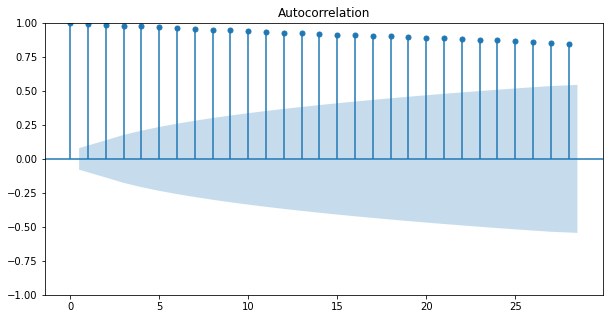

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(10,5))
plot_acf(data_inr['value'])
print()

## Obs - 

    From ACF, we can observe a auto-correlation upto 25 lag values

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


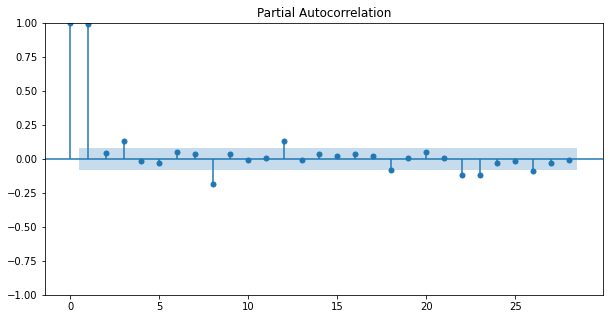

In [17]:
plt.rc("figure", figsize=(10,5))
plot_pacf(data_inr['value'])
print()

## Obs - 

    Partial auto-correlation shows only few lag values are actually correlated. 

# 📙 4. Price forecasting

## 4.1 Train - Test Split

In [18]:
data = data_inr['value'].values
print('Shape of data: ', data.shape)

Shape of data:  (608,)


## Obs - 

    Very few data points are available, so we will go for either ARIMA or LSTM with fewer nodes. 

In [19]:
# Separate train and test data
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', len(train_data), len(test_data))

Train length:  486
Shape of Train and Test data:  486 122


## 4.2 Make time-series data supervised

In [20]:
# split a univariate sequence into supervised learning [Input and Output]
from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

## 4.3 Choose Lag value

In [21]:
lag = 3  # Empirically we have choosen
n_features = 1

In [22]:
train_X, train_y = split_sequence(train_data, lag)
test_X, test_y = split_sequence(test_data, lag)

In [23]:
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (483, 3) (483,)
Shape of test_X and test_y:  (119, 3) (119,)


In [24]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

In [25]:
# New shape of train_X and test_X are :-
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)


Shape of train_X and train_y:  (483, 3, 1) (483,)
Shape of test_X and test_y:  (119, 3, 1) (119,)


## 4.4 Define Model

In [26]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [27]:
# define model
model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences=False, input_shape=(lag, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                1152      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


## 4.5 Fit the model - with training data

In [28]:
# As you are trying to use function decorator in TF 2.0, 
# please enable run function eagerly by using below line after importing TensorFlow:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [29]:
# fit model
history = model.fit(train_X, train_y, epochs = 25, batch_size=8, verbose=1, validation_split= 0.1)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/25
55/55 [==============================] - 1s 22ms/step - loss: 1549.0719 - val_loss: 221.6179
Epoch 2/25
55/55 [==============================] - 1s 21ms/step - loss: 19.9934 - val_loss: 0.8156
Epoch 3/25
55/55 [==============================] - 1s 21ms/step - loss: 0.2652 - val_loss: 0.2556
Epoch 4/25
55/55 [==============================] - 1s 21ms/step - loss: 0.2267 - val_loss: 0.2559
Epoch 5/25
55/55 [==============================] - 1s 22ms/step - loss: 0.2262 - val_loss: 0.2644
Epoch 6/25
55/55 [==============================] - 1s 21ms/step - loss: 0.2259 - val_loss: 0.2575
Epoch 7/25
55/55 [==============================] - 1s 23ms/step - loss: 0.2242 - val_loss: 0.2552
Epoch 8/25
55/55 [==============================] - 1s 22ms/step - loss: 0.2272 - val_loss: 0.2595
Epoch 9/25
55/55 [==============================] - 1s 22ms/step - loss: 0.2234 - val_loss: 0.2558
Epoch 10/25
55/55 [==============================] - 1s 22ms/step - loss: 0.2295 - val_loss: 0.2622
Epo

## 4.6 Summarize model Loss

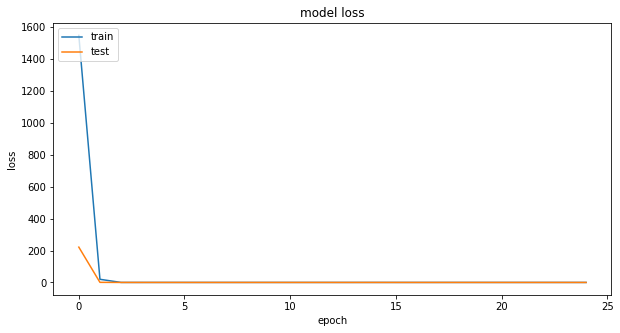

In [30]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Obs - 

    We could have stopped in 10th epoch

## 4.7 Make prediction - with Test data

In [31]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

Shape of train and test predict:  (483, 1) (119, 1)


## 4.8 Model evaluation

In [32]:
# root mean squared error or rmse
import math
from sklearn.metrics import mean_squared_error

def measure_rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

train_score = measure_rmse(train_y, train_predict)
test_score = measure_rmse(test_y, test_predict)

print('Train and Test RMSE: ', train_score, test_score)

Train and Test RMSE:  0.4747818181016509 0.45455345282414783


## 4.9 Plot test data and Predicted data

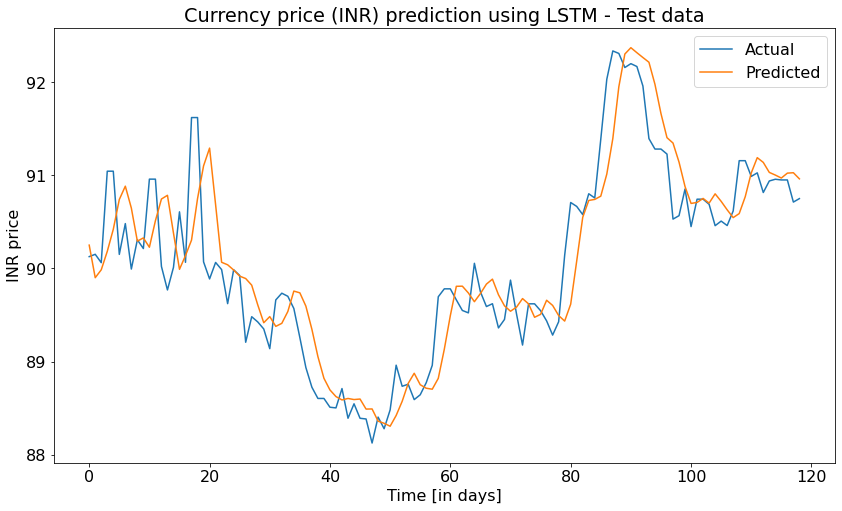

In [33]:
plt.rc("figure", figsize=(14,8))
plt.rcParams.update({'font.size': 16})
plt.plot(test_y, label = 'Actual')
plt.plot(test_predict, label = 'Predicted')
plt.xlabel('Time [in days]')
plt.ylabel('INR price')
plt.title('Currency price (INR) prediction using LSTM - Test data')
plt.legend()
plt.show()

**Further Ananlysis and Prediction to be carried out using GridSearch using Boosting Algorithms**